- Nama : Rendika Nurhartanto Suharto
- Email : rendikarendi96@gmail.com
- Id Dicoding : RENDIKA NURHARTANTO SUHARTO

In [1]:
!pip install opencv-python matplotlib

In [2]:
pip install split-folders

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import splitfolders
import os, os.path
from PIL import Image
import time
import numpy as np
from google.colab import files
import keras.utils as image
import random
import shutil
from keras.preprocessing import image

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

print("the version of tensorflow that use in this session is " + tf.__version__)

the version of tensorflow that use in this session is 2.15.0


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load File

In [5]:
# path joining version for other paths - Banyaknya data yang dimiliki
paper_dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning | DFS Foundation X Dicoding/rockpaperscissors/Data RockPaperScissors/paper'
print ("Paper:", sum(len(files) for _, _, files in os.walk(paper_dir)))
rock_dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning | DFS Foundation X Dicoding/rockpaperscissors/Data RockPaperScissors/rock'
print ("Rock:", sum(len(files) for _, _, files in os.walk(rock_dir)))
scissors_dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning | DFS Foundation X Dicoding/rockpaperscissors/Data RockPaperScissors/scissors'
print ("Scissors:", sum(len(files) for _, _, files in os.walk(scissors_dir)))

main_dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning | DFS Foundation X Dicoding/rockpaperscissors/Data RockPaperScissors'
print ("Total Data:", sum(len(files) for _, _, files in os.walk(main_dir)))

Paper: 712
Rock: 726
Scissors: 750
Total Data: 2188


In [6]:
# Definisikan path untuk direktori data train dan validation
train_dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning | DFS Foundation X Dicoding/rockpaperscissors/Data_train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning | DFS Foundation X Dicoding/rockpaperscissors/Data_validation'
# test_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding - IDCamp/Machine Learning/rockpaperscissors/testing images'


# # Buat direktori train dan validation untuk menampung data yang di split
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [7]:
# Fungsi untuk membagi data menjadi train dan validation
def split_data(source, train, validation, split_size):
    files = os.listdir(source)
    random.sample(files, len(files))  # Acak urutan file untuk memastikan pemilihan acak

    train_files = files[:int(len(files) * split_size)]
    validation_files = files[int(len(files) * split_size):]

    os.makedirs(train, exist_ok=True)  # Buat direktori train jika belum ada
    os.makedirs(validation, exist_ok=True)  # Buat direktori validation jika belum ada

    for file in train_files:
        shutil.copy(os.path.join(source, file), os.path.join(train, file))

    for file in validation_files:
        shutil.copy(os.path.join(source, file), os.path.join(validation, file))

# Bagi data untuk setiap kategori
split_data(paper_dir, train_dir + '/paper', validation_dir + '/paper', 0.6)
split_data(rock_dir, train_dir + '/rock', validation_dir + '/rock', 0.6)
split_data(scissors_dir, train_dir + '/scissors', validation_dir + '/scissors', 0.6)

In [8]:
# Hitung total data train dan validation
total_train = sum(len(files) for _, _, files in os.walk(train_dir))
total_validation = sum(len(files) for _, _, files in os.walk(validation_dir))


print(f"Total Data Train: {total_train}")
print(f"Total Data Validation: {total_validation}")

Total Data Train: 1312
Total Data Validation: 876


# Checking Data

In [10]:
labels = ['paper','scissors','rock']
nb = len(labels)

In [9]:
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            img=load_img(os.path.join(folder,image), target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0
            dataset.append((img,count))
        print(f'\rCompleted: {label}',end='')
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X),np.array(y)

In [17]:
X, y = input_target_split(main_dir,labels)

Completed: rock

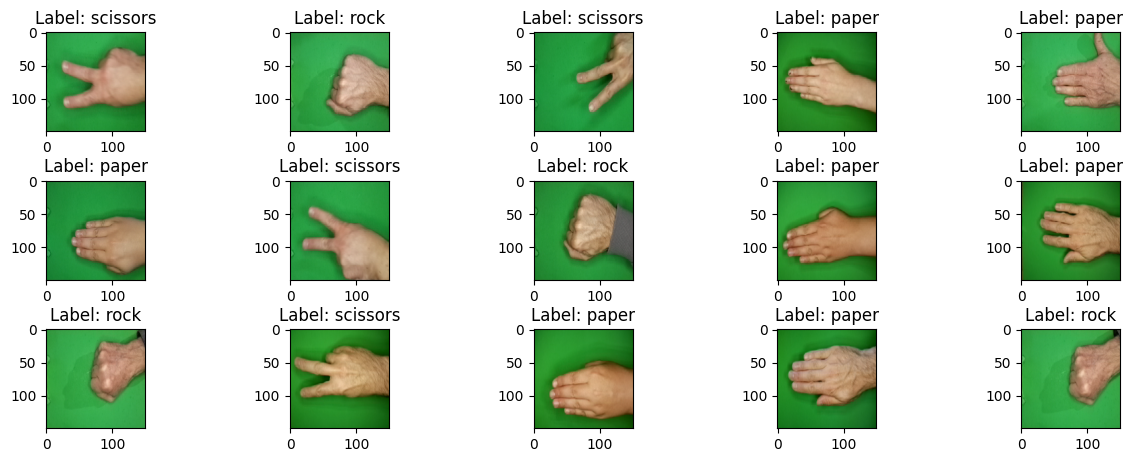

In [18]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

# Image Generator + Augmentation Image

In [20]:
# Image augmentation
train_datagenerator = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True, #horizontal flip untuk posisi tangan horizontal
                    vertical_flip=True,
                    rotation_range=20, #random rotation antara 0-90 derajat
                    width_shift_range=0.2, #prosentasi width untuk random shift
                    height_shift_range=0.2, #prosentasi height untuk random shift
                    zoom_range = 0.2,
                    shear_range=0.1,
                    fill_mode = 'nearest')

validation_datagenerator = ImageDataGenerator(
                    rescale=1./255,
                    fill_mode = 'nearest')

In [21]:
#Persiapan Data Training dan Validasi Generator

train_generator = train_datagenerator.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        class_mode='categorical', # Klasifikasi Multi-Class (>2)
        batch_size=50,
        shuffle = True,
        seed = 7)

validation_generator = validation_datagenerator.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=50,
        class_mode='categorical', # Klasifikasi Multi-Class (>2)
        shuffle = True,
        # subset = "training", # Training berarti data validasi dibagi sedemikian rupa, dan yang ini digunakan untuk menguji performa model dengan validasi
        seed = 7)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Callback for monitoring the accuracy

In [45]:
#Penggunaan Callback untuk menghentikan proses training sesuai akurasi yang diinginkan

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        val_accuracy = logs.get('val_accuracy')
        accuracy = logs.get('accuracy')

        if val_accuracy is not None and accuracy is not None:
            if val_accuracy > 0.96 and accuracy > 0.96:
                print("\nSudah >96% nih akurasinya jadi diberhentikan saja!")
                self.model.stop_training = True
            else:
                print("\nBelum mencapai akurasi >96%, lanjutkan training.")
        else:
            print("\nNilai akurasi tidak tersedia. Lanjutkan training.")


callbacks = myCallback()

# Deep learning Arsitektur sequential model

In [46]:
#Model sederhana Deep Learning 2 Conv dan 2 Fully Connected Layer (dense layer)
model = tf.keras.models.Sequential([ #Menggunakan model Sequential
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.3), #melakukan dropout(mematikan neuron) pada 30% layer sebelumnya
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax') #3 kelas
])

#Jadi, terdapat dua lapisan konvolusi, satu lapisan Flatten, satu lapisan Dropout, dan dua lapisan Dense (fully connected) dalam model ini.

In [47]:
# Meng-compile model dengan Adam Optimizer dengan loss Categorical_Crossentropy karena multiclass classification
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dropout_2 (Dropout)         (None, 41472)            

# Visualize of my model architecture

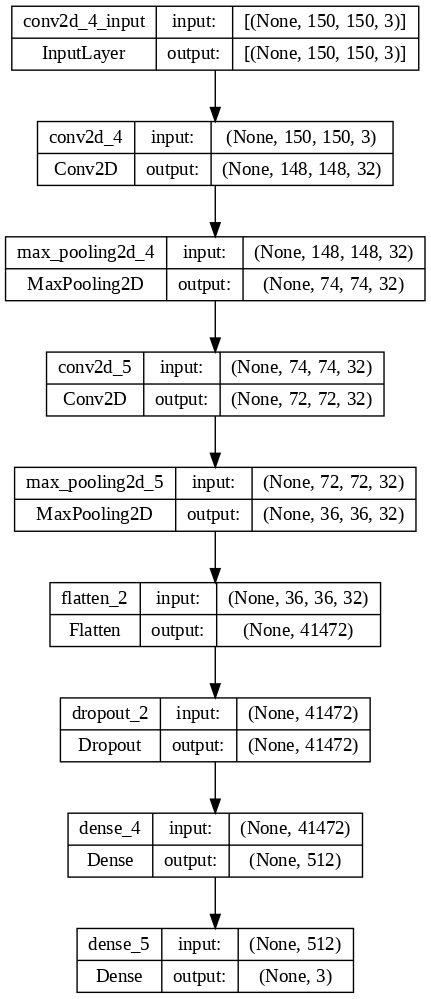

In [49]:
model_viz = tf.keras.utils.plot_model(model,
                          # to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=100)
model_viz

# Let's Train The Model Now

### Assign the initial parameter values for Training Model

In [50]:
# Jumlah data dalam train_generator
total_train_data = train_generator.n
print("Total data di train_generator:", total_train_data)

# Jumlah data dalam validation_generator
total_validation_data = validation_generator.n
print("Total data di validation_generator:", total_validation_data)

Total data di train_generator: 1312
Total data di validation_generator: 876


In [51]:
epoh = 100 # Tentukan banyaknya model melakukan satu putaran penuh terhadap seluruh dataset training.
batch_size = 50 # seberapa banyak model membagi data train pada setiap epoch yang dilakukan

# Hitung steps_per_epoch dan validation_steps
steps_per_epoch = int(np.ceil(total_train_data / batch_size)) # ini tergantung pada banyak data dan jumlah batch_sizenya
validation_steps = int(np.ceil(total_validation_data / batch_size))  # ini tergantung pada banyak data dan jumlah batch_sizenya

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

# Tentukan kondisi EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor akurasi pada data validasi (nilai ini yang diperhatikan)
    patience=10,  # Toleransi untuk tidak ada peningkatan (10 iterasi jika akurasi menunjukkan nilai-nilai yang homogen maka stop)
    restore_best_weights=True,  # Kembalikan bobot terbaik ketika berhenti
    verbose=1
)

In [53]:
start_time = time.time()
history = model.fit(
    train_generator,  # Data generator untuk data latih
    steps_per_epoch=steps_per_epoch,  # Jumlah iterasi dalam setiap epoch (dihitung dari total data latih dan batch size)
    epochs=epoh,  # Jumlah epoch yang akan dilakukan selama proses pelatihan
    validation_data=validation_generator,  # Data generator untuk data validasi
    validation_steps=validation_steps,  # Jumlah iterasi dalam setiap epoch saat melakukan validasi
    callbacks=[callbacks, early_stopping],  # Daftar callbacks yang akan digunakan selama pelatihan
    verbose=2  # Level kejelasan pesan yang akan ditampilkan selama pelatihan (informasi lebih detail)
)

print("--- Waktu training adalah %s menit ---" % ((time.time() - start_time)/60))

Epoch 1/100

Belum mencapai akurasi >96%, lanjutkan training.
27/27 - 16s - loss: 1.4568 - accuracy: 0.3270 - val_loss: 1.0576 - val_accuracy: 0.4475 - 16s/epoch - 607ms/step
Epoch 2/100

Belum mencapai akurasi >96%, lanjutkan training.
27/27 - 15s - loss: 1.0634 - accuracy: 0.4284 - val_loss: 1.0251 - val_accuracy: 0.4829 - 15s/epoch - 568ms/step
Epoch 3/100

Belum mencapai akurasi >96%, lanjutkan training.
27/27 - 15s - loss: 1.0429 - accuracy: 0.4619 - val_loss: 0.9101 - val_accuracy: 0.7260 - 15s/epoch - 548ms/step
Epoch 4/100

Belum mencapai akurasi >96%, lanjutkan training.
27/27 - 15s - loss: 0.9988 - accuracy: 0.4962 - val_loss: 0.8024 - val_accuracy: 0.8196 - 15s/epoch - 562ms/step
Epoch 5/100

Belum mencapai akurasi >96%, lanjutkan training.
27/27 - 15s - loss: 0.8266 - accuracy: 0.6654 - val_loss: 0.4887 - val_accuracy: 0.8733 - 15s/epoch - 567ms/step
Epoch 6/100

Belum mencapai akurasi >96%, lanjutkan training.
27/27 - 16s - loss: 0.6109 - accuracy: 0.7744 - val_loss: 0.329

# Evaluasi Model

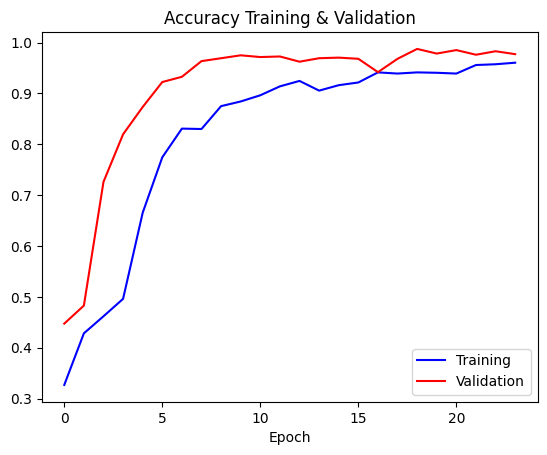

In [54]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

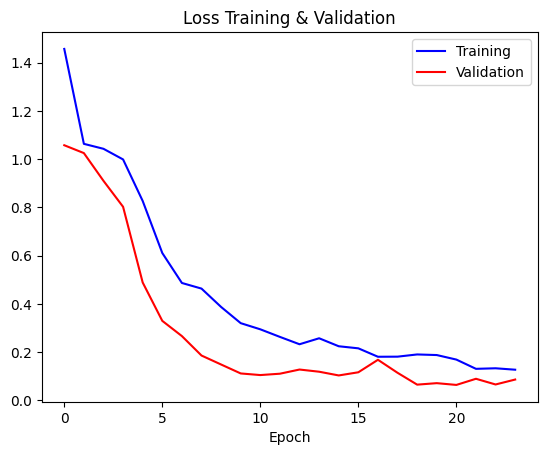

In [55]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [56]:
# Melakukan evaluasi terhadap model menggunakan data validasi
evaluation = model.evaluate(validation_generator, steps=validation_steps, verbose=1)

# Menampilkan hasil evaluasi
print(f"Loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1]}")

18/18 [==============================] - 4s 214ms/step - loss: 0.0865 - accuracy: 0.9772
Loss: 0.08651537448167801
Accuracy: 0.9771689772605896


# Save the model

In [57]:
# #'model' akan di save ke local file
# model.save('/content/drive/MyDrive/Colab Notebooks/Machine Learning | DFS Foundation X Dicoding/RockPaperScissors_model')  # Replace 'path_to_save_model' with your desired path

In [58]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("/content/drive/MyDrive/Colab Notebooks/Machine Learning | DFS Foundation X Dicoding/RockPaperScissors_model")  # Replace 'path_to_save_model' with the saved model's path

In [59]:
# Melakukan evaluasi terhadap model menggunakan data validasi
evaluation = loaded_model.evaluate(validation_generator, steps=validation_steps, verbose=1)

# Menampilkan hasil evaluasi
print(f"Loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1]}")

18/18 [==============================] - 4s 220ms/step - loss: 0.0865 - accuracy: 0.9772
Loss: 0.08651537448167801
Accuracy: 0.9771689772605896


# My model has ***`97.7%`*** Accuracy ✅


# Try to predict here

In [72]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 1: Load and Preprocess Test Images
test_folder_path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning | DFS Foundation X Dicoding/rockpaperscissors/Data_testing"
img_size = (150, 150)

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Step 2: Make Predictions
def make_predictions(model, image_path):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    return predictions

# Step 3: Post-process Predictions
def interpret_predictions(predictions, class_labels):
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

# List of class labels used during training
class_labels = ['Kertas', 'Batu', 'Gunting']

# Iterate through images in the testing folder
for filename in os.listdir(test_folder_path):
    if filename.endswith(".png"):  # Assuming images are in JPG format
        image_path = os.path.join(test_folder_path, filename)

        # Make predictions
        predictions = make_predictions(loaded_model, image_path)

        # Interpret predictions
        predicted_label = interpret_predictions(predictions, class_labels)

        # Display results or save them as needed
        print(f"Image: {filename}, Predicted Class: {predicted_label}")

1/1 [==============================] - 0s 25ms/step
Image: Batu_01.png, Predicted Class: Batu
1/1 [==============================] - 0s 20ms/step
Image: Batu_02.png, Predicted Class: Batu
1/1 [==============================] - 0s 20ms/step
Image: Gunting_02.png, Predicted Class: Gunting
1/1 [==============================] - 0s 20ms/step
Image: Gunting_01.png, Predicted Class: Gunting
1/1 [==============================] - 0s 20ms/step
Image: Kertas_02.png, Predicted Class: Kertas
1/1 [==============================] - 0s 20ms/step
Image: Kertas_01.png, Predicted Class: Kertas


Saving paper_7.jpg to paper_7.jpg
1/1 [==============================] - 0s 24ms/step
[[1. 0. 0.]]
File: paper_7.jpg, Predicted Class: Kertas


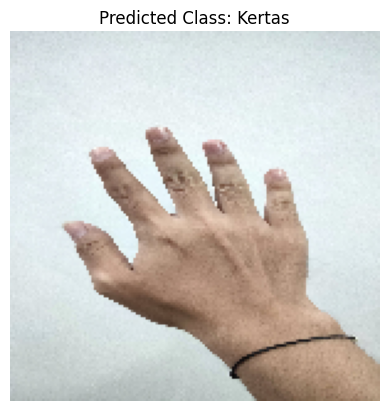

In [73]:
from keras.preprocessing import image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

class_names = ['Kertas', 'Batu', 'Gunting']  # List nama kelas

# Fungsi untuk memprediksi gambar yang diunggah
def predict_uploaded_image(file_path, model):
    img = image.load_img(file_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    return classes

# Menerima file gambar yang diunggah
uploaded = files.upload()

# Lakukan prediksi pada setiap file yang diunggah
for file_name in uploaded.keys():
    file_path = file_name
    result = predict_uploaded_image(file_path, loaded_model)
    print(result)
    predicted_class_index = np.argmax(result)
    predicted_class_name = class_names[predicted_class_index]  # Sesuaikan dengan nama kelas Anda
    print(f"File: {file_name}, Predicted Class: {predicted_class_name}")

    # Tampilkan gambar
    img = image.load_img(file_path, target_size=(150, 150))
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class_name}")
    plt.axis('off')  # Hilangkan sumbu x dan y
    plt.show()